# Rappels sur scikit-learn et le machine learning (correction)

Quelques exercices simples sur *scikit-learn*. Le notebook est long pour ceux qui débutent en machine learning et sans doute sans suspens pour ceux qui en ont déjà fait.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Des données synthétiques

On simule un jeu de données aléatoires.

In [3]:
from numpy import random
n = 1000
X = random.rand(n, 2)
X[:5]

array([[0.33151303, 0.70686719],
       [0.13039027, 0.58941167],
       [0.612744  , 0.37799233],
       [0.20215973, 0.11095186],
       [0.56857961, 0.10783821]])

In [4]:
y = X[:, 0] * 3 - 2 * X[:, 1] ** 2 + random.rand(n)
y[:5]

array([0.10121972, 0.49414321, 2.19975264, 0.74372472, 2.27103021])

## Exercice 1 : diviser en base d'apprentissage et de test

Simple [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Exercice 2 : caler une régression linéaire

Et calculer le coefficient $R^2$. Pour ceux qui ne savent pas se servir d'un moteur de recherche : [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [r2_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg.predict(X_test))
score

0.908988490753245

## Exercice 3 : améliorer le modèle en appliquant une transformation bien choisie

Le modèle de départ est : $Y = 3 X_1 - 2 X_2^2 + \epsilon$. Il suffit de rajouter des featues polynômiales avec [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(X_train)
X_train2 = poly.transform(X_train)
reg2 = LinearRegression()
reg2.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
score2 = r2_score(y_test, reg2.predict(poly.transform(X_test)))
score2

0.9362394073926681

Le coefficient $R^2$ est plus élevé car on utilise les mêmes variables que le modèle. Il n'est théoriquement pas possible d'aller au delà.

## Exercice 4 : caler une forêt aléatoire

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
r2_score(y_test, rf.predict(X_test))

0.9153506166386053

Le modèle linéaire est le meilleur modèle dans notre cas puisque les données ont été construites de la sorte. Il est attendu que le $R^2$ ne soit pas plus élevé tout du moins pas significativement plus élevé. On regarde avec les features polynômiales...

In [12]:
rf2 = RandomForestRegressor()
rf2.fit(X_train2, y_train)
r2_score(y_test, rf2.predict(poly.transform(X_test)))

0.9119002367619022

Avant de tirer des conclusions hâtives, il faudrait recommencer plusieurs fois l'expérience avant de dire que la performance est plus ou moins élevée avec ces features ce que ce notebook ne fera pas puisque la réponse théorique est connue dans ce cas.

## Exercice 5 : un peu de math

Comparer les deux modèles sur les données suivantes ? Que remarquez-vous ? Expliquez pourquoi ?

In [13]:
X_test2 = random.rand(n, 2) + 0.5
y_test2 = X_test2[:, 0] * 3 - 2 * X_test2[:, 1] ** 2 + random.rand(n)

In [14]:
res = []
for model in [reg, reg2, rf, rf2]:
    name = model.__class__.__name__
    try:
        pred = model.predict(X_test)
        pred2 = model.predict(X_test2)
    except Exception:
        pred = model.predict(poly.transform(X_test))
        pred2 = model.predict(poly.transform(X_test2))
        name += " + X^2"
    res.append(dict(name=name, r2=r2_score(y_test, pred),
                    r2_jeu2=r2_score(y_test2, pred2)))

import pandas
df = pandas.DataFrame(res)
df

,name,r2,r2_jeu2
0,LinearRegression,0.908988,0.682467
1,LinearRegression + X^2,0.936239,0.948110
2,RandomForestRegressor,0.915351,0.493273
3,RandomForestRegressor + X^2,0.911900,0.517105


Le seul modèle qui s'en tire vraiment est la régression linéaire avec les features polynômiales. Comme il équivaut au modèle théorique, il est normal qu'il ne se plante pas trop même si ses coefficients ne sont pas identique au modèle théorique (il faudrait plus de données pour que cela converge).

In [15]:
reg2.coef_, reg2.intercept_

(array([ 0.        ,  2.81692538, -0.29768531,  0.08662761,  0.13367719,
        -1.7515442 ]), 0.5889925538787228)

Pour les autes modèles, voyons déjà visuellement ce qu'il se passe.

## Exercice 6 : faire un graphe avec...

Je laisse le code décrire l'approche choisie pour illustrer les carences des modèles précédents. Le commentaire suit le graphique pour les paresseux.

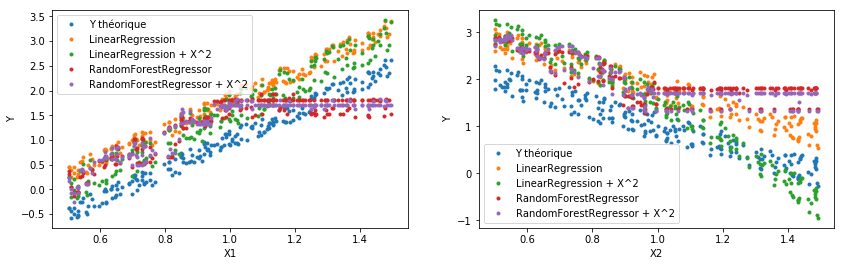

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

a, b = 0.9, 1.1
index1 = (X_test2[:, 0] >= a) & (X_test2[:, 0] <= b)
index2 = (X_test2[:, 1] >= a) & (X_test2[:, 1] <= b)
yth = X_test2[:, 0] * 3 - 2 * X_test2[:, 1]


ax[0].set_xlabel("X1")
ax[0].set_ylabel("Y")
ax[0].plot(X_test2[index2, 0], yth[index2], '.', label='Y théorique')
ax[1].set_xlabel("X2")
ax[1].set_ylabel("Y")
ax[1].plot(X_test2[index1, 1], yth[index1], '.', label='Y théorique')

for model in [reg, reg2, rf, rf2]:
    name = model.__class__.__name__
    try:
        pred2 = model.predict(X_test2)
    except Exception:
        pred2 = model.predict(poly.transform(X_test2))
        name += " + X^2"
    ax[0].plot(X_test2[index2, 0], pred2[index2], '.', label=name)
    ax[1].plot(X_test2[index1, 1], pred2[index1], '.', label=name)
ax[0].legend()
ax[1].legend();

Le graphe étudie les variables des modèles selon une coordonnées tout en restreignant l'autre dans un intervalle donné. On voit tout de suite que la forêt aléatoire devient constante au delà d'un certain seuil. C'est encore une fois tout à fait normal puisque la base d'apprentissage ne contient des $X_1, X_2$ que dans l'intervalle $[0, 1]$. En dehors, chaque arbre de décision produit une valeur constante tout simplement parce que ce sont des fonctions en escalier : une forêt aléatoire est une moyenne de fonctions en escalier, elle est bornée. Quant à la première régression linéaire, elle ne peut saisir les effets du second degré, elle est linéaire par rapport aux variables de départ. Elle s'écarte moins mais elle s'écarte quand même de la variable à prédire.

Cet exercice a pour but d'illustrer qu'un modèle de machine learning est estimé sur un jeu de données qui suit une certaine distribution. Lorsque les données sur lesquelles le modèle est utilisé pour prédire ne suivent plus cette loi, les modèles retournent des réponses qui ont toutes les chances d'être fausses et ce, de manière différente selon les modèles.

C'est pour cela qu'on dit qu'il faut réapprendre régulièrement les modèles de machine learning, surtout s'ils sont appliqués sur des données générées par l'activité humaine et non des données issues de problèmes physiques.

## Exercice 7 : illuster l'overfitting avec un arbre de décision

Sur le premier jeu de données.

In [17]:
from sklearn.tree import DecisionTreeRegressor

res = []
for md in range(1, 20):
    tree = DecisionTreeRegressor(max_depth=md)
    tree.fit(X_train, y_train)
    r2_train = r2_score(y_train, tree.predict(X_train))
    r2_test = r2_score(y_test, tree.predict(X_test))
    res.append(dict(profondeur=md, r2_train=r2_train, r2_test=r2_test))

df = pandas.DataFrame(res)
df.head()

,profondeur,r2_test,r2_train
0,1,0.380103,0.446387
1,2,0.636346,0.672284
2,3,0.786778,0.826594
3,4,0.872799,0.892911
4,5,0.896276,0.931297


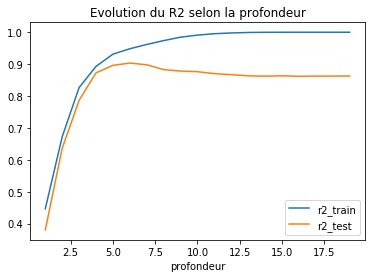

In [18]:
ax = df.plot(x='profondeur', y=['r2_train', 'r2_test'])
ax.set_title("Evolution du R2 selon la profondeur");

## Exercice 8  : augmenter le nombre de features et régulariser une régression logistique

L'objectif est de regarder l'impact de la régularisation des coefficients d'une régression logistique lorsque le nombre de features augmentent. On utilise les features polynômiales et une régression [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) ou [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

In [19]:
from sklearn.linear_model import Ridge, Lasso
import numpy.linalg as nplin
import numpy

def coef_non_nuls(coef):
    return sum(numpy.abs(coef) > 0.001)

res = []
for d in range(1, 21):
    poly = PolynomialFeatures(degree=d)    
    poly.fit(X_train)
    X_test2 = poly.transform(X_test)
    
    reg = LinearRegression()
    reg.fit(poly.transform(X_train), y_train)
    r2_reg = r2_score(y_test, reg.predict(X_test2))
    
    rid = Ridge(alpha=10)
    rid.fit(poly.transform(X_train), y_train)
    r2_rid = r2_score(y_test, rid.predict(X_test2))
    
    las = Lasso(alpha=0.01)
    las.fit(poly.transform(X_train), y_train)
    r2_las = r2_score(y_test, las.predict(X_test2))
    
    res.append(dict(degre=d, nb_features=X_test2.shape[1],
                    r2_reg=r2_reg, r2_las=r2_las, r2_rid=r2_rid,
                    norm_reg=nplin.norm(reg.coef_),
                    norm_rid=nplin.norm(rid.coef_),
                    norm_las=nplin.norm(las.coef_),
                    nnul_reg=coef_non_nuls(reg.coef_),
                    nnul_rid=coef_non_nuls(rid.coef_),
                    nnul_las=coef_non_nuls(las.coef_),
                    ))

df = pandas.DataFrame(res)
df

,degre,nb_features,nnul_las,nnul_reg,nnul_rid,norm_las,norm_reg,norm_rid,r2_las,r2_reg,r2_rid
0,1,3,2,2,2,3.403924,3.568168e+00,3.079896,0.906854,0.908988,0.892232
1,2,6,4,5,5,3.280738,3.334211e+00,2.350989,0.934247,0.936239,0.919758
2,3,10,4,9,9,3.280888,5.090698e+00,2.072340,0.934247,0.935657,0.921656
3,4,15,4,14,14,3.280963,1.180973e+01,1.992448,0.934248,0.934934,0.921532
4,5,21,4,20,20,3.281022,6.657031e+01,1.972762,0.934248,0.935177,0.921656
5,6,28,4,27,26,3.281037,3.242570e+02,1.965189,0.934248,0.934388,0.921823
6,7,36,4,35,35,3.281040,1.428490e+03,1.958965,0.934248,0.933246,0.921927
7,8,45,4,44,43,3.281041,1.441240e+04,1.952981,0.934248,0.931307,0.921976
8,9,55,4,55,53,3.281041,4.893616e+13,1.947737,0.934248,0.616562,0.921997
9,10,66,4,65,65,3.281041,4.659569e+05,1.943600,0.934248,0.929751,0.922013


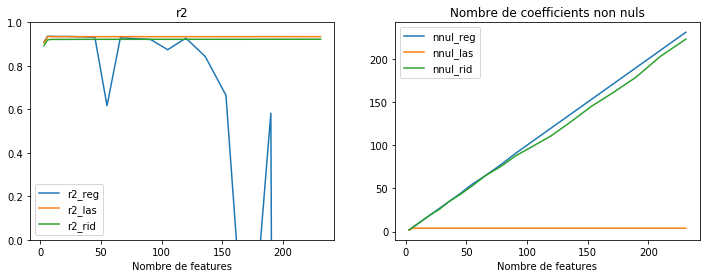

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="nb_features", y=["r2_reg", "r2_las", "r2_rid"], ax=ax[0])
ax[0].set_xlabel("Nombre de features")
ax[0].set_ylim([0, 1])
ax[0].set_title("r2")
df.plot(x="nb_features", y=["nnul_reg", "nnul_las", "nnul_rid"], ax=ax[1])
ax[1].set_xlabel("Nombre de features")
ax[1].set_title("Nombre de coefficients non nuls");

Numériquement, la régression linéaire devient difficile à estimer lorsque le nombre de features augmente. Théoriquement, il ne devrait pas y avoir de baisse de performances mais le graphe montre des erreurs évidentes. Cela se traduit par une norme des coefficients qui explose. La régularisation parvient à contraindre les modèles. La régression *Ridge* produira beaucoup de petits coefficients non nuls, la régression *Lasso* préfèrera concentrer la norme sur quelques coefficients seulement. Cette observation n'est vraie que dans le cas d'une régression linéaire avec une erreur quadratique.